# Исследование игровой индустрии

## Описание проекта

Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В нашем распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

## Цель проекта

Необходимо отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## План работы

1. Загрузка данных.
2. Предварительная обработка.
3. Добавление нового столбца с суммарными продажами.
4. Исследовательский анализ данных.
5. Ссоставление портрета пользователя по регионам продаж.
6. Проверка гипотез

## Описание данных

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Настройка окружения

In [1]:
# подключаем необходимые бтблиотеки
import pandas as pd
import numpy as np
import seaborn as sb
import re
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# создадим функцию вывода информации о датасете
def dataset_info(dataset):
    print(dataset.info())
    display(dataset.sample(15))

## Загрузка данных

In [3]:
# загрузим предоставленный датасет
try:
    data_games = pd.read_csv('/datasets/games.csv')

except:
    data_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
# настраиваем полное отображение таблиц
pd.set_option('display.max_columns', None)

In [5]:
# выводим таблицу и данные по ней
dataset_info(data_games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7025,Mafia,XB,2004.0,Action,0.17,0.05,0.00,0.01,66.0,7.7,M
7397,ClayFighter 63 1/3,N64,1997.0,Fighting,0.17,0.04,0.00,0.00,NaN,NaN,NaN
15137,Blade Arcus from Shining EX,PS3,2015.0,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9434,Wantame Music Channel: Doko Demo Style,DS,2007.0,Misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
9801,Cabela's Dangerous Hunts 2011,DS,2010.0,Sports,0.11,0.00,0.00,0.01,NaN,tbd,T
14161,Puyo Pop Fever(us sales),DS,2004.0,Puzzle,0.03,0.00,0.00,0.00,NaN,NaN,NaN
14903,Gauntlet / Rampart,GBA,2005.0,Misc,0.02,0.01,0.00,0.00,NaN,tbd,E
12931,MLB SlugFest 2006,XB,2006.0,Sports,0.04,0.01,0.00,0.00,59.0,tbd,E10+
5006,LocoRoco,PSP,2006.0,Platform,0.14,0.04,0.16,0.03,83.0,8.7,E
8608,Ghost in the Shell: Stand Alone Complex,PS2,2004.0,Adventure,0.08,0.06,0.00,0.02,NaN,NaN,NaN


**Промежуточный вывод:**  данные загрузились без ошибок. В датафрейме 12 столбцов и 16715 строк, в данных присутствуют пропуски, название столбцов с буквами верхнего регистра, а так же некорректные типы данных.

## Предобработка данных

### Изменение названий столбцов

In [6]:
# сохраним первоначальный датафрейм отдельно, чтоб потом оценить количество удаленных данных
data_old = data_games.copy()

In [7]:
# приводим названия к "змеиному стилю"
data_games.columns = data_games.columns.str.lower()
# убедимся, что все получилось
data_games.columns.unique()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Поиск дубликатов

In [8]:
# проверим на наличие явных дубликатов
data_games.duplicated().sum()

0

явные дубликаты отсутствуют

### Поиск неявных дубликатов

Проверим наличие дубликатов по имени, платформе и году релиза

In [9]:
data_games[data_games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Нашли два дубликата, посмотрим в каких из них большая полнота информации (я конечно понимаю, что дубликат с пропуском в столбце name мы в последующем удалим, но для общей логики процесса - посмотрим).

In [10]:
# выведем первые строки дубликатов
data_games[data_games.duplicated(['name', 'platform', 'year_of_release'], keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Наибольшей полнотой информации по остальным столбца имеют первые, встречающиеся, строки. Поэтому удалим неявные дубликаты с меньшим объемом информации из датасета (вторые встречающиеся строчки)

In [11]:
data_games = data_games.drop_duplicates(['name', 'platform', 'year_of_release'])
# проверим, что остались именно нужные строки
data_games.iloc[[604,659]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Таким образом, нашли два неявных дубликата, удалили дублируюищеся строки с меньшим объемом инфрмации.

### Обработка пропусков

In [12]:
# выведем общее количество пропусков
data_games.isnull().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [13]:
# посчитаем процент пропусков в данных для каждого столбца
100 * (data_games.isna().sum() / len(data_games)).sort_values().round(5)

platform            0.000
na_sales            0.000
eu_sales            0.000
jp_sales            0.000
other_sales         0.000
name                0.006
genre               0.006
year_of_release     1.610
user_score         40.089
rating             40.477
critic_score       51.319
dtype: float64

Видим, что наибольшее количество пропусков в столбцах user_score, rating, critic_score, от 40 до 51 % от всего объема данных. Относительно небольшое количество пропусков - 1.6 % в столбце year_of_release. Совсем небольшое количество, по 0.012 % в столбцах name и genre.

#### Пропуски в столбцах name и genre.

In [14]:
# выведем данные с попусками в стобце name
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Видим, что всего одна строки, для них же не заполнен стобец genre. Адекватной замены мы подобрать не сможем. Поэтому удалим строку с пропусками из датафрейма.

Данные пропуски могли возникнуть в силу того, что обе игры довольно старые - 1993 и не очень популярные, информация по ним просто могла не сохраниться, хотя нельзя исключать и технического сбоя при выгрузки информации.

In [15]:
# удалим пропуски
data_games = data_games.dropna(subset=['name'])
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Пропуски в столбце year_of_release

In [16]:
# посмотрим на данные с пропусками в столбце год релиза
data_games[data_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего 269 пропущенных значений.
Так как пропуски в данном столбце заполнить медианными или средними значениями не представляется возможным, и в силу небольшого количества этих пропусков (порядка 1.6 % от всего количества данных), то принимаем решение удалить данные.

In [17]:
# удаляем данные с пропусками
data_games = data_games.dropna(subset=['year_of_release'])

# проверяем
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в данном столбце могли возникнуть вследствие технического сбоя при выгрузке информации.

#### Пропуски в столбцах critic_score и user_score

Числовые столбцы, характеризиющие оценку игр профессиональными критиками и непосредственно пользователями. Посмотрим на уникальные значения в данных столбцах.

In [18]:
# столбец critic_score
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Шкала оценок, по сути от 0 до 100, целые числа, учтем это при изменении типов данных. Данный столбец не представляется возможным заполнить средним, медианой или модой. Но данных с пропусками много, поэтому чтоб не потерять их заполним значениями индикаторами, выберем "-666" (отрицательное число).

In [19]:
#заменяем пропуски
data_games['critic_score'] = data_games['critic_score'].fillna(-666)

# проверяем
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

In [20]:
# столбец user_score
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Шкала оценок от 0 до 10, с десятичными после запятой. Кроме стандартных пропусков значений видим tbd. Гугл подсказывает, что это - to be determined - подлежит определению. Используется, если какая-то информация еще не определена или решение по вопросу не принято. По сутит тот же not a number. Заменим значения tbd на nan.

In [21]:
data_games['user_score'] = data_games['user_score'].replace('tbd',np.nan)
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Данный столбец не представляется возможным заполнить средним, медианой или модой. Но данных с пропусками много, поэтому чтоб не потерять их заполним значениями индикаторами, выберем "-666" (отрицательное число).

In [22]:
data_games['user_score'] = data_games['user_score'].fillna(-666)

# проверяем
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки.

#### Пропуски в столбце rating

In [23]:
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Категориальный, нечисловой тип данных. Пропусков много, это связанно с тем, что по данному рейтингу марикруются игры выпущенные для Северной Америки и Канады, для игр, выпущенных в других регионах этот рейтинг не заполняется. Чтоб не терять информацию - заменим их заполним значениями индикаторами, выберем - 'не промарикрованно'.

In [24]:
data_games['rating'] = data_games['rating'].fillna('не промаркированно')

data_games['rating'].unique()

array(['E', 'не промаркированно', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC',
       'RP'], dtype=object)

In [25]:
data_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски в данном столбце возникли вследствие по причине маркировки игр только для игр выпущенных для Северной Америки и Канады.

In [26]:
# проверим какое количество данных удалили
100 - 100 * data_games.shape[0] / data_old.shape[0]  

1.627280885432242

Процент удаленных данных находится на приемлимом уровне.

### Изменение типов данных

#### Столбец year_of_release

Столбец с датой релиза видеоигры имеет тип данных float, изменим тип данных на DataTime

In [27]:
# производим изменение данных
data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format='%Y').dt.year

# проверяем
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-666.0,-666,не промаркированно
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-666.0,-666,не промаркированно


#### Столбец critic_score

Выше отмечали, что в данном столбце значения по сути от 0 до 100, поэтому тип данных можно зпменить на целочисленные.

In [28]:
# производим изменение данных
data_games['critic_score'] = data_games['critic_score'].astype('int')

# проверяем
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-666,-666,не промаркированно
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-666,-666,не промаркированно


#### Столбец user_score

Данный столбец имеет тип object, заменим его на float

In [29]:
# производим изменение данных
data_games['user_score'] = data_games['user_score'].astype('float')

# проверяем
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


Изменение данных прошло успешно.

### Создание столбца с суммарными продажами по всем регионам

In [30]:
# суммируем продажи по всем регионам и сохраняем результаты в новый столбец
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


### Промежуточные выводы

В ходе предварительной обработки данных была проделена следующая работа:


  - названия столбцов датафрейма приведены к "змеиному стилю";
  
  
  - явные дубликаты не были обнаружены;
  
  
  - были обнаружены неявные дубликаты по названию игры, платформе и году релиза, удалены дуюлирующиеся строчки с меньшим объемом информации в других столбцах;
  
  
  - обработка пропусков:
    - удалены строки с пропусками по столбцам 'year_of_release', 'name' и 'genre';
    - количество удаленных данных - порядка 1.63 % от первоначального объема данных;
    - пропуски в столбцах 'critic_score' и 'user_score' (числовые данные) заменены на значения-индикаторы (отрицательные числа);
    - пропуски в столбце 'rating' (категориальные данные) заменены на значения-индикаторы (unknown);
  
  
  - изменены типы данных: 'year_of_release' на DateTime, 'critic_score' на int, 'user_score' на float.
  
  
  - создан дополнительный столбец с суммарными продажами по всем регионам.

In [31]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Исследовательский анализ данных

### Количество выпускаемых игр по годам

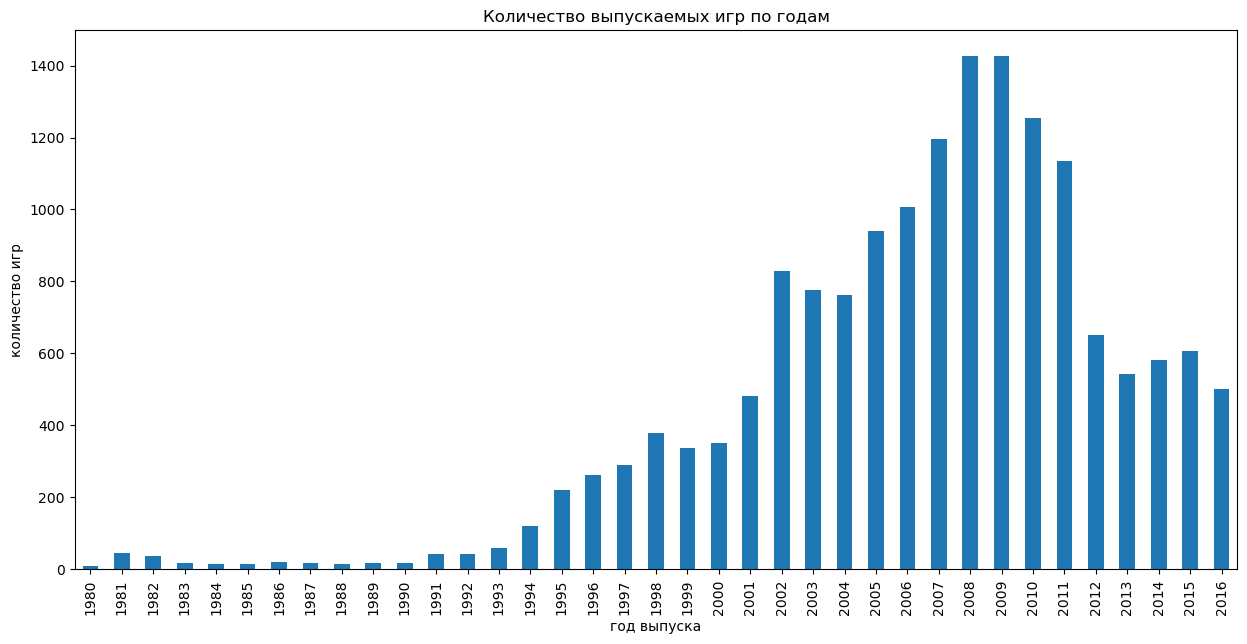

In [32]:
# сгруппируем данные по годам и построим барплот
data_games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,7), legend=False);

plt.title('Количество выпускаемых игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр');

Видим, что начиная с 1994-1995 года, количество выпускаемых видеоигр начинает резко расти, это можно связать с выходом в 1994 году пристаки PlayStation 1.

Следующий скачок, по количеству выпускаемых игр, приходится на 2001-2002 года, что может быть связанно с выходом приставки PlayStation 2 в 2000-м году.

Следующий скачок, по количеству выпускаемых игр, приходится на 2006-2007 года, что может быть связанно с выходом приставки PlayStation 3 в 2006-м году.

Пик по количеству выпускаемых видеоигр пришелся на 2099-2010 года. После этого начался спад, который можно связать с развитием рынка мобильных устройств и уходом пользователей в мобильные игры.

С 2012 года количество выпускаемых видеоигр находится приблизительно на одном уровне. Поэтому для последующего прогнозирования на 2017 год будем брать данные с 2012 года.

### Продажи видеоигр по платформам. Характерный срок жизни платформы.

Для данного исследования возьмем данные начиная с 1994 года, когда началась первая волна роста.

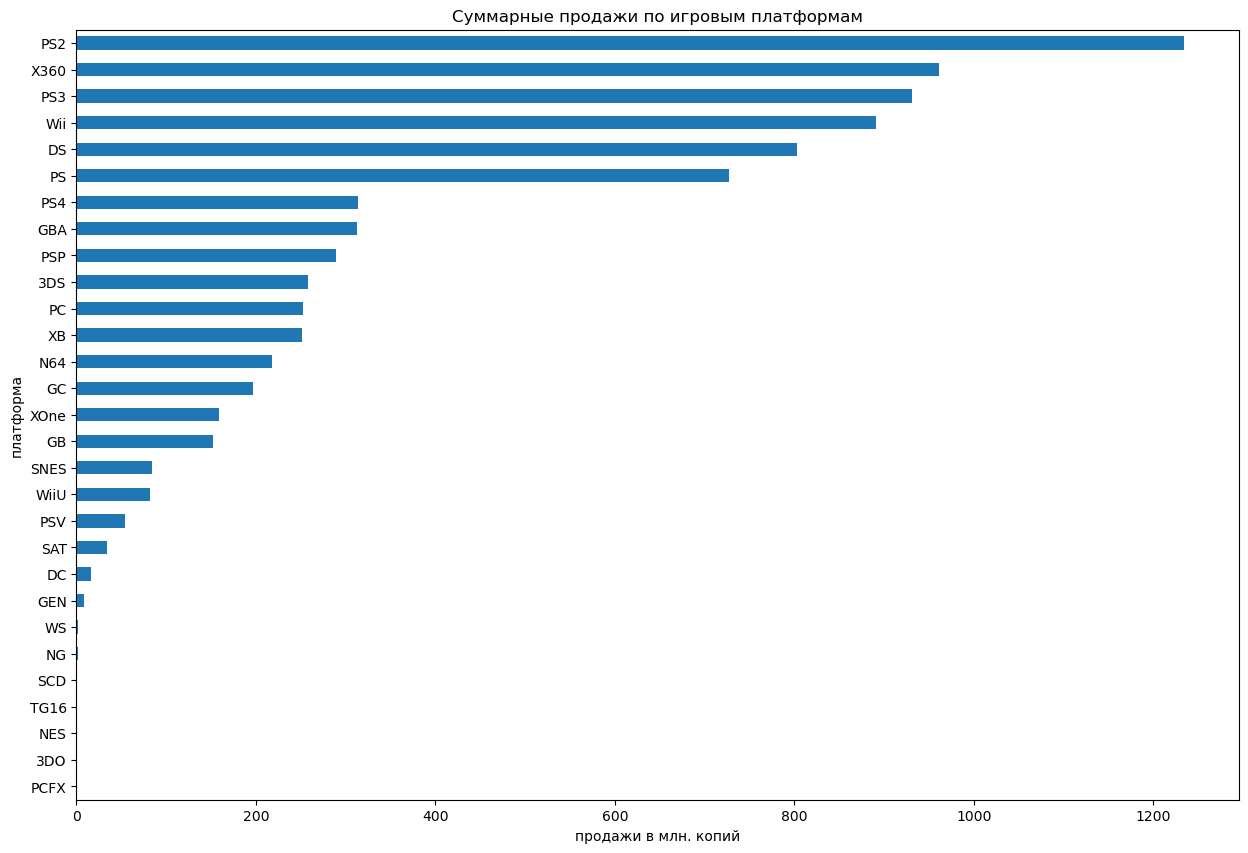

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [33]:
# сгруппируем данные с условием по году и построим барплот
data_games[data_games['year_of_release'] >= 1994].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales').plot(kind='barh', figsize=(15,10), legend=False);
plt.title('Суммарные продажи по игровым платформам')
plt.xlabel('продажи в млн. копий')
plt.ylabel('платформа');
plt.show()

# выведем информацию в табличном виде
data_games[data_games['year_of_release'] >= 1994].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)

Как видим есть определенный топ-8 платформ: 
- с большим отрывом идет платформа PS2 - около 1240 млн. копий;
- далее группа платформ Х360, PS3, Wii, DS и PS: 720 - 960 млн. копий;
- далее платформы PS4 и GBA - gjhzlrf 320 млн. копий.

Остальные платформы имеют продажи менее 200 млн копий.

In [34]:
# создадим датафрейм по топ-8 платформ
top_platforms = data_games.query('year_of_release >= 1994').pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(8).index
top_platforms_stat = data_games.query('(platform in @top_platforms) & (year_of_release >= 1994)')


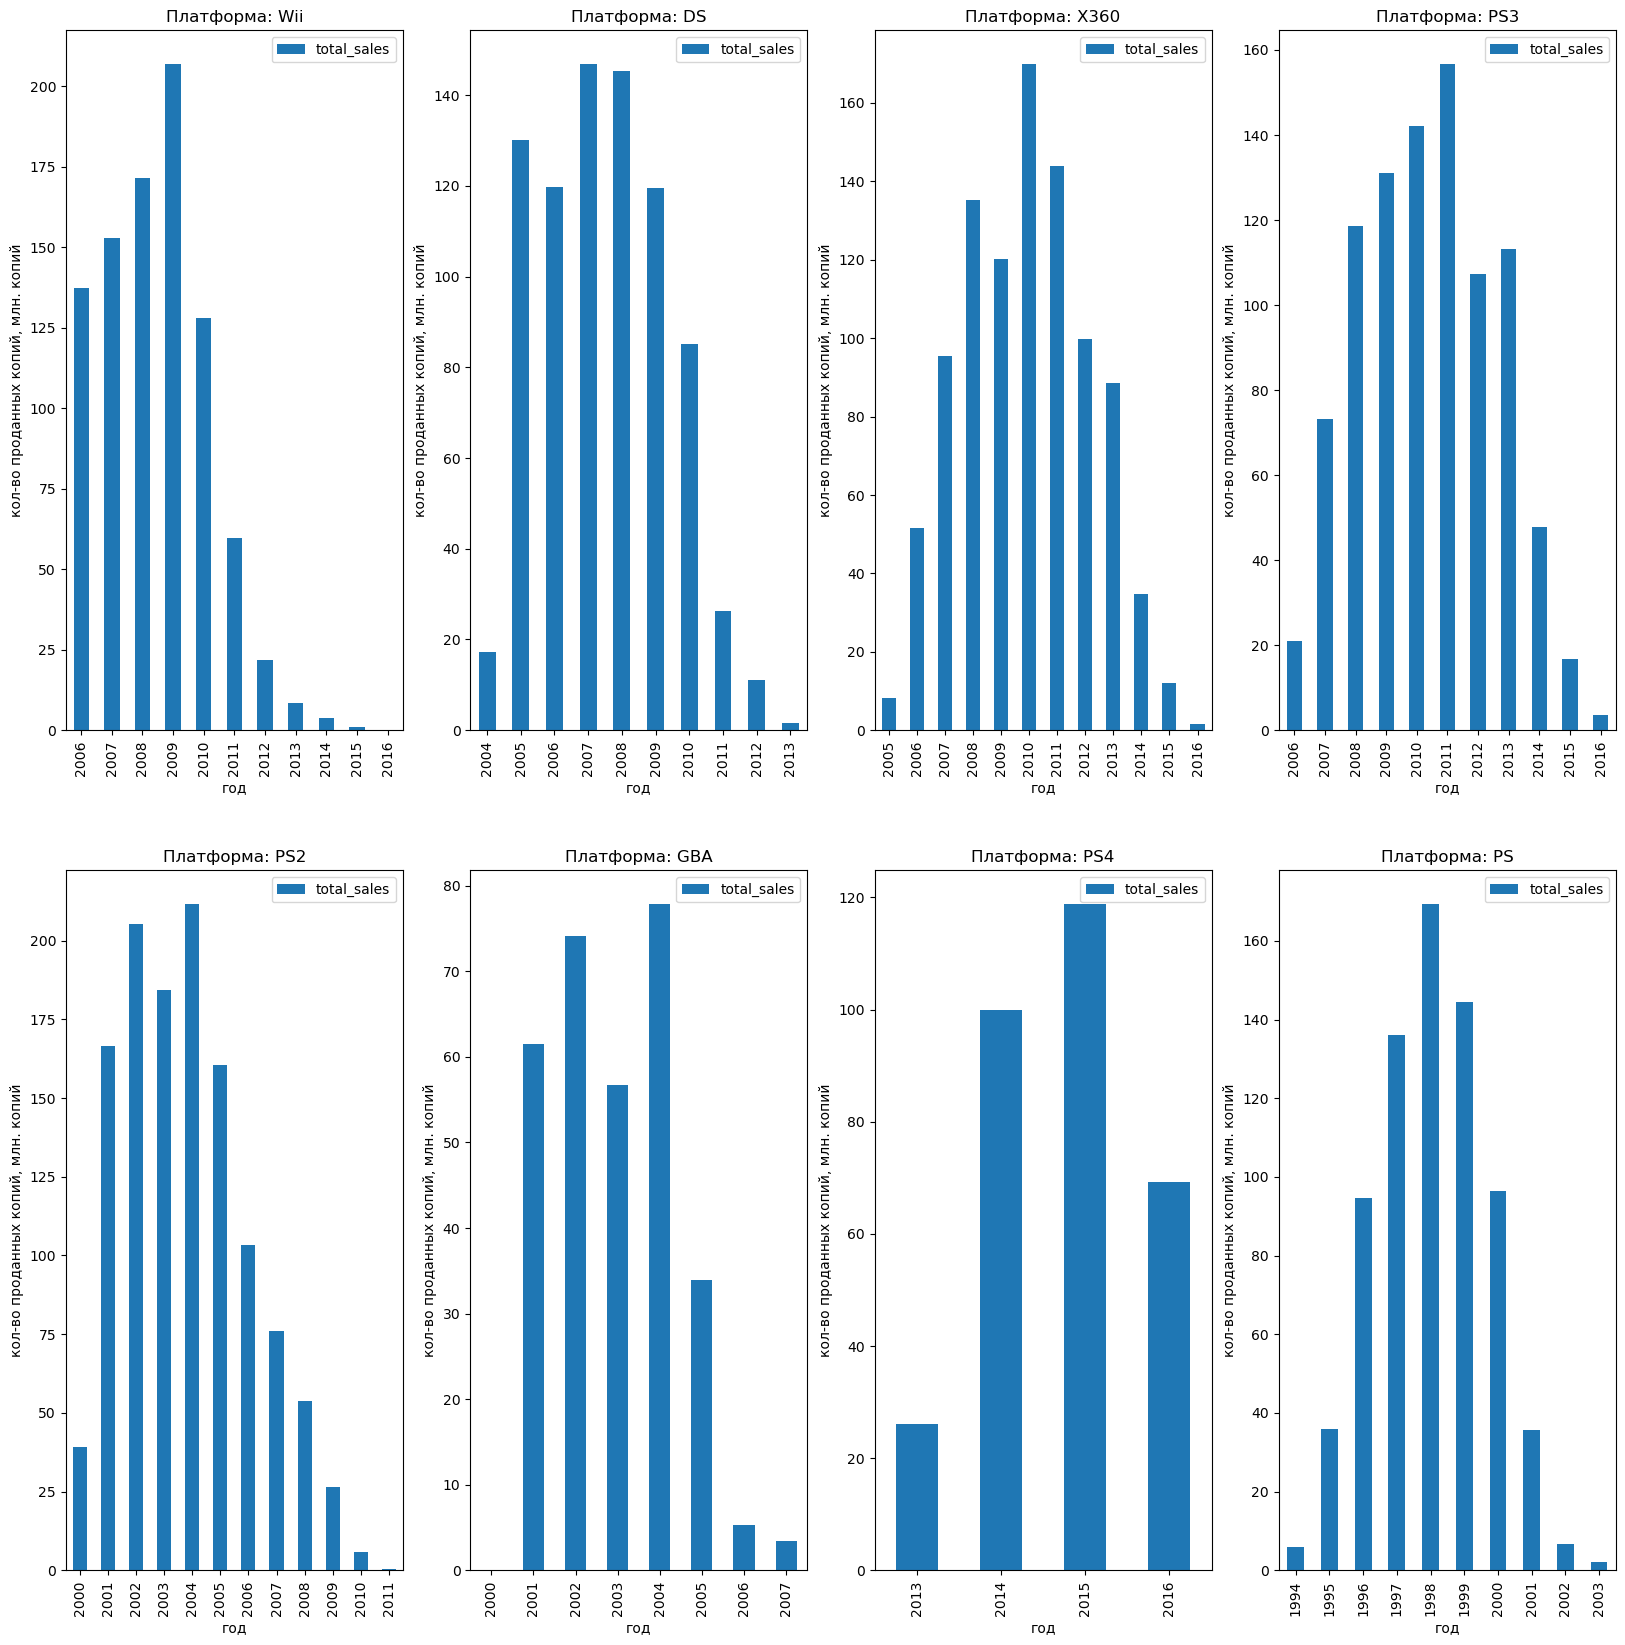

In [35]:
# построим барплоты для топ-8 платформ
i = 1
for p in top_platforms_stat['platform'].unique():
    ax = plt.subplot(2, 4,  i)
    top_platforms_stat[top_platforms_stat['platform'] == p]\
    .pivot_table(index='year_of_release',  values='total_sales', aggfunc='sum')\
    .plot(kind='bar', ax=ax, figsize=(20,20));
    plt.xlabel('год')
    plt.ylabel('кол-во проданных копий, млн. копий');
    plt.title('Платформа: ' + p)
    i += 1

In [36]:
# оценим среднее время нахождения платформы на рынке
temp = data_games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Можно сделать вывод о том, что среднее время нахождения платформы на рынке - 7 лет.  Выбивается PS4, но это объяснимо - платформа была выпущена 4 года назад (относительно 2016 года). Продажи по этой платформе за 2016 год ниже чем за 2015, но это связанно с возможной неполнотой данных за 2016 год.

### Динамика продаж видеоигр в актуальный период.

В предыдущей части исследования, мы определили, что наиболее актуальными данными для планирования продаж неа 2017 год, будут данные за период с 2012 года. С этого периода, уже во всю включился фактор мобильной игровой индустрии.

In [37]:
# создаем датафрейм с актуальными данными
data_games_actual = data_games.query('year_of_release >= 2012')

# выясняем суммарные продажи по платформам
data_games_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Видим, что из списка выделяется 5 платформ. Исследуем динамику продаж по ним.

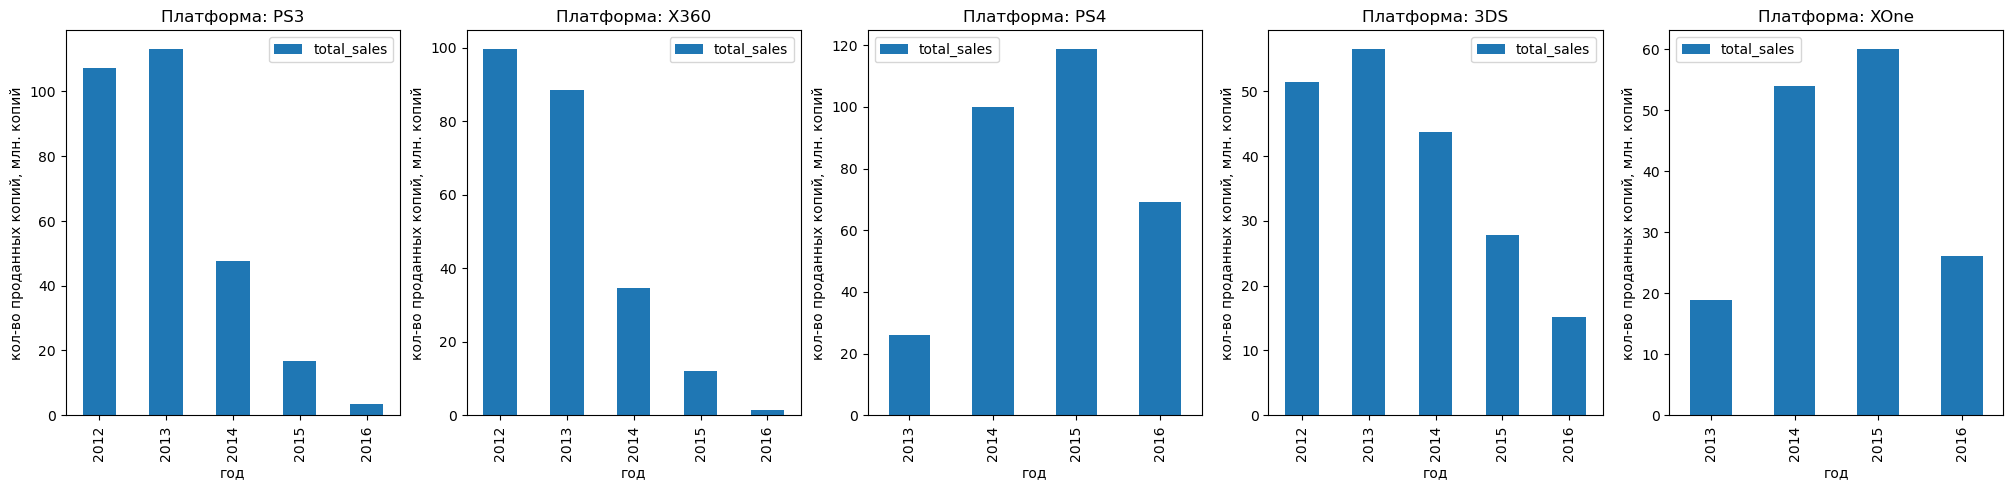

In [38]:
# создаем датафрейм с данными по топ-5 платформ
top_actual_platforms = data_games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(5).index

top_actual_platforms_stat = data_games_actual.query('platform in @top_actual_platforms')

#строим барплоты по продажам по топ-5 платформам
i = 1
for p in top_actual_platforms_stat['platform'].unique():
    ax = plt.subplot(1, 5,  i)
    top_actual_platforms_stat[top_actual_platforms_stat['platform'] == p]\
    .pivot_table(index='year_of_release',  values='total_sales', aggfunc='sum')\
    .plot(kind='bar', ax=ax, figsize=(25, 5));
    plt.xlabel('год')
    plt.ylabel('кол-во проданных копий, млн. копий');
    plt.title('Платформа: ' + p)
    i += 1

Можно сделать вывод, что по актуальным платформам продажи падают. Для платформ PS3, X360 и 3DS падение наблюдается на протяжении 2-3-х последних лет. Для более свежих платформ PS4 и XOne вывод о падении возможно не столь однозначен - на текущих данных видим максимум продаж в 2015 году, но у нас нет информации о полноте данных за 2016 год.

### Продажи игр в разбивке по платформам

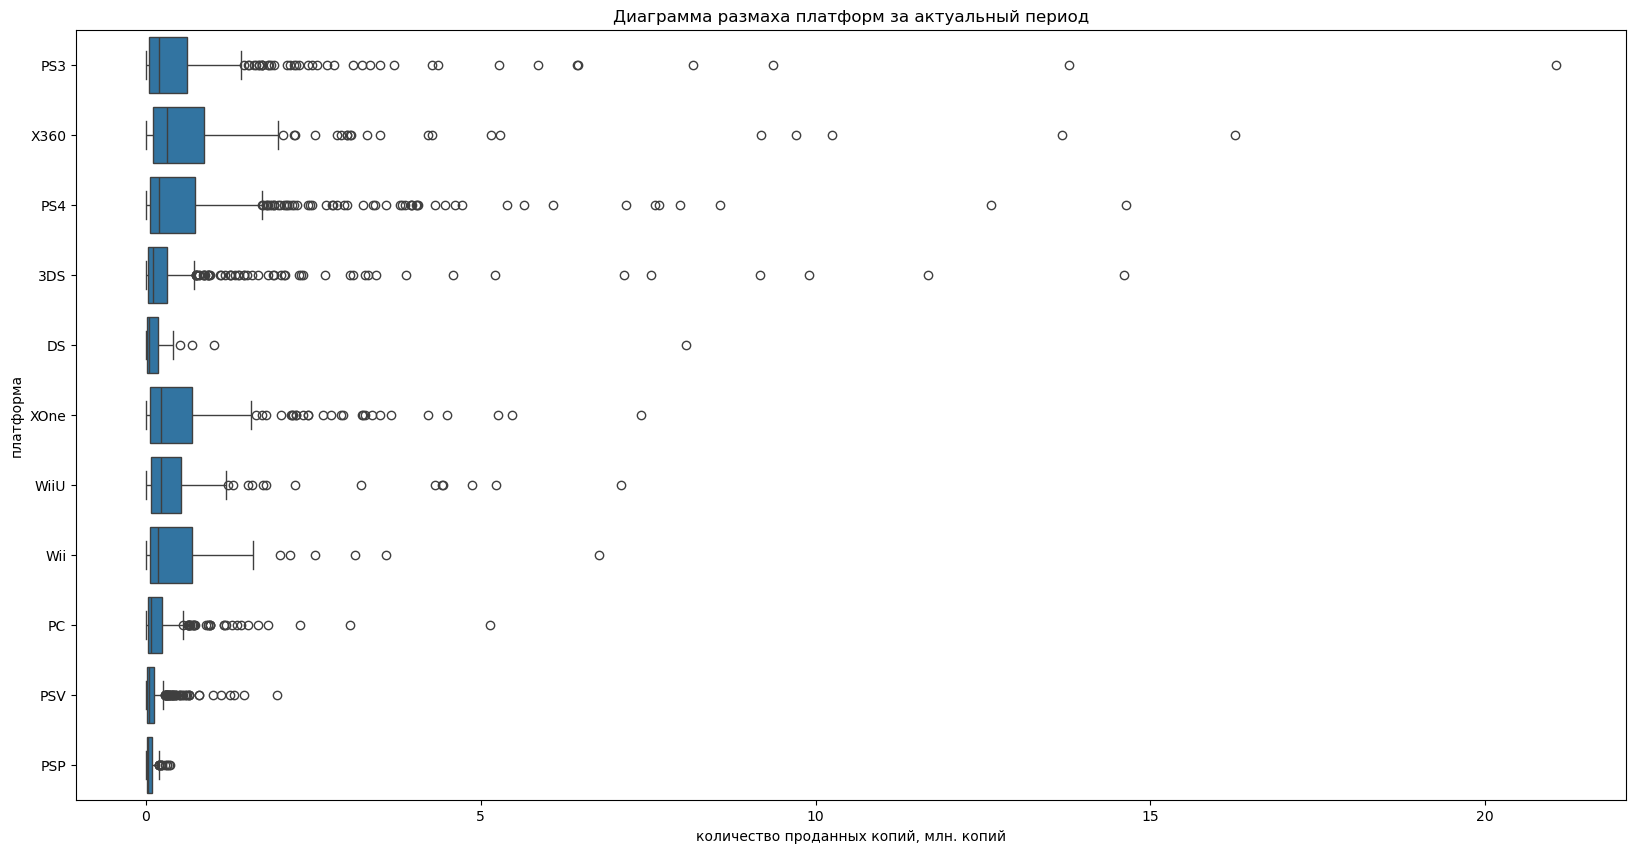

In [39]:
# построим боксплоты по продажам по актуальному периоду
plt.figure(figsize=(20, 10))
sb.boxplot(data=data_games_actual, x='total_sales', y='platform', orient='h');
plt.xlabel('количество проданных копий, млн. копий')
plt.ylabel('платформа')
plt.title('Диаграмма размаха платформ за актуальный период')
plt.show()

Из графика видно, что у каждой из рассматриваемых платформ было определенное количество хитовых игр, которые делали аномально высокие продажи. На боксплотах они выглядят как выбросы. Ограничим общую сумму продаж 2 млн. копий.

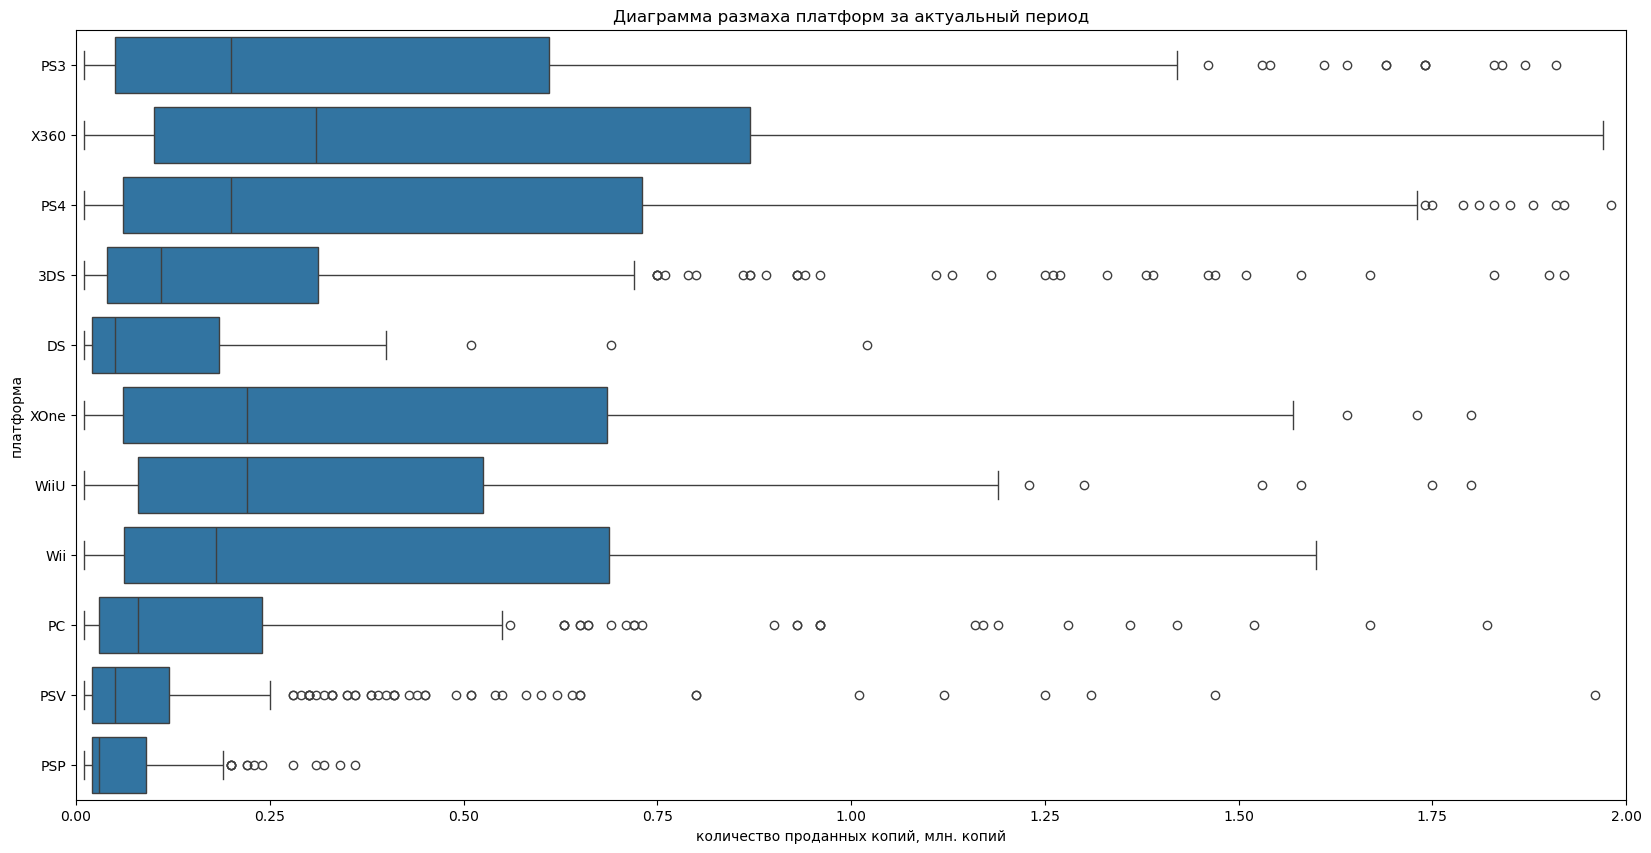

In [40]:
# ограничиваем ось х
plt.figure(figsize=(20, 10))
sb.boxplot(data=data_games_actual, x='total_sales', y='platform', orient='h');
plt.xlim(0,2)
plt.xlabel('количество проданных копий, млн. копий')
plt.ylabel('платформа')
plt.title('Диаграмма размаха платформ за актуальный период')
plt.show()

In [41]:
# выводим численную статистику по актуальным платформам
for p in data_games_actual['platform'].unique():
    print(str(p),'\n', data_games_actual[data_games_actual['platform'] == p]['total_sales'].describe(),'\n')

PS3 
 count    492.000000
mean       0.586951
std        1.464113
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64 

X360 
 count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64 

PS4 
 count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64 

3DS 
 count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64 

DS 
 count    31.000000
mean      0.404839
std       1.439245
min       0.010000
25%       0.020000
50%       0.050000
75%       0.185000
max       8.060000
Name: total_sales, dtype: float64 

Видим, что для актуальных площадок медианное значение глобальных продаж находится в интервале 0.03 - 0.31 млн. копий. При этом у каждой площадки наблюдается большое количество игр-хитов, значения продаж, для которых, на порядок выше 80-ти % значений, в соотвествующих выборок. Так средние значения больше медианных в 2-4 раза. 


Пять площадок имеют медианное значение 0.18 - 0.22 млн.копиий: PS3, PS4, XOne, WiiU и Wii. 

Четыре площадки имеют медианное значение 0.03 - 0.08 млн.копиий: DS, PC, PSV и PSP

Медианное значение площадки X360 - 0.31 млн.копиий.


Медианное значение площадки 3DS - 0.11 млн.копиий.

Можно сказать, что площадка X360 обладает несколько большей стабильностью продаж.

### Корреляции между отзывами и продажами

Создадим фенуции для отрисовки диаграм рассеивания. Учтем, что значения-индикаторы нужно откинуть.

In [42]:
# функция для отрисовки диаграмм рассеивания и вывода коэффициента корреляции для оценок критиков
def critic_scat(plat):
    top_actual_platforms_stat[(top_actual_platforms_stat['platform'] == plat) & (top_actual_platforms_stat['critic_score'] >= 0)]\
    .plot(kind='scatter', x='critic_score', y='total_sales', figsize=(7, 7))
    plt.title(plat + ' оценки критиков')
    plt.xlabel('оценка критиков')
    plt.ylabel('количество проданных копий, млн. копий')
    plt.show()

    print('Коэффициент корреляции продаж и оценки критиков:', top_actual_platforms_stat[(top_actual_platforms_stat['platform'] == plat)\
    & (top_actual_platforms_stat['critic_score'] >= 0)]['critic_score'].corr(top_actual_platforms_stat[(top_actual_platforms_stat['platform'] ==\
    plat) & (top_actual_platforms_stat['critic_score'] >= 0)]['total_sales']))

In [43]:
# функция для отрисовки диаграмм рассеивания и вывода коэффициента корреляции для пользовательских оценок
def user_scat(plat):
    top_actual_platforms_stat[(top_actual_platforms_stat['platform'] == plat) & (top_actual_platforms_stat['user_score'] >= 0)]\
    .plot(kind='scatter', x='user_score', y='total_sales', figsize=(7, 7))
    plt.title(plat + ' пользовательские оценки')
    plt.xlabel('оценка пользователей')
    plt.ylabel('количество проданных копий, млн. копий')
    plt.show()

    print('Коэффициент корреляции продаж и оценки пользователей:', top_actual_platforms_stat[(top_actual_platforms_stat['platform'] == plat)\
    & (top_actual_platforms_stat['user_score'] >= 0)]['user_score'].corr(top_actual_platforms_stat[(top_actual_platforms_stat['platform'] ==\
    plat) & (top_actual_platforms_stat['user_score'] >= 0)]['total_sales']))

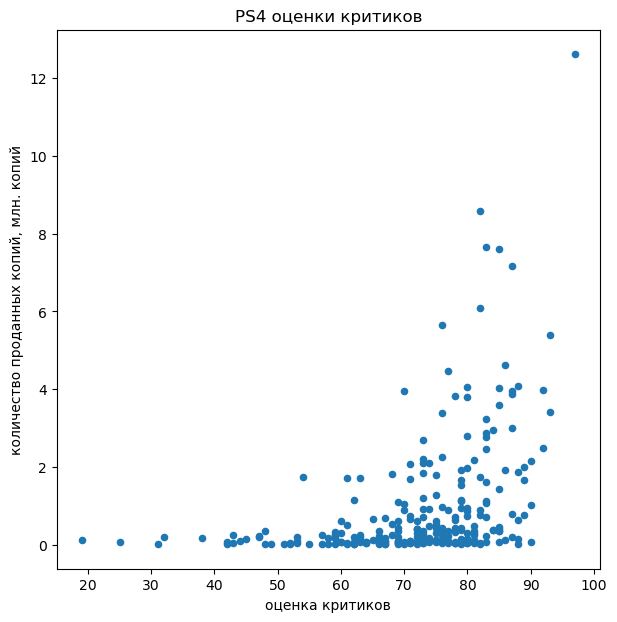

Коэффициент корреляции продаж и оценки критиков: 0.40656790206178095


In [44]:
# выведем диагармму рассеивания по оценкам критиков для самой популярной актуальной площадки
critic_scat('PS4')

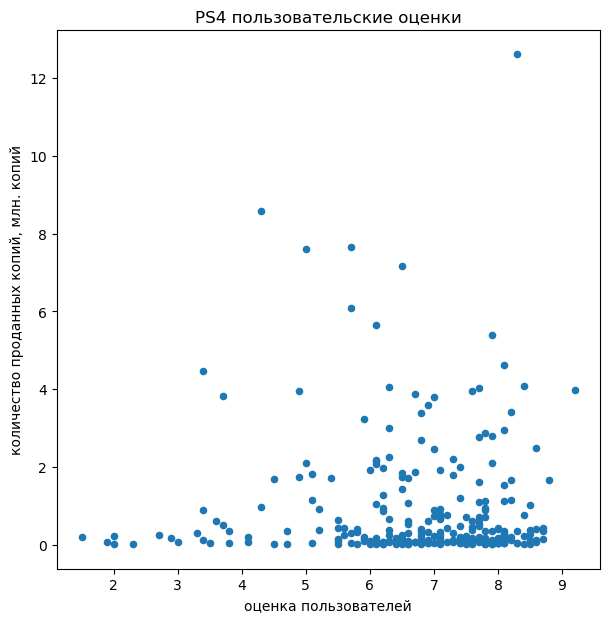

Коэффициент корреляции продаж и оценки пользователей: -0.031957110204556424


In [45]:
# выведем диагармму рассеивания по оценкам пользователей для самой популярной актуальной площадки
user_scat('PS4')

Для наиболее популярной актуальной платформы PS4 можно наблюдать слабую положительную корреляцию между оценками критиков и продажами - чем выше оценка критиков, тем больше копий игры продано. Это объяснимо, критики - профессиональные участники рынка, к мнению которых прислушиваются пользователи.

С оценками пользователей и продажами, корреляция практически отсутствует. Это говорит о том, что при принятии решения о покупке, потенциальный клиент мало полагается на отзывы обычных людей.

Проверим корелляционные зависимости для оставшихся актуальных площадок из ТОП-5.

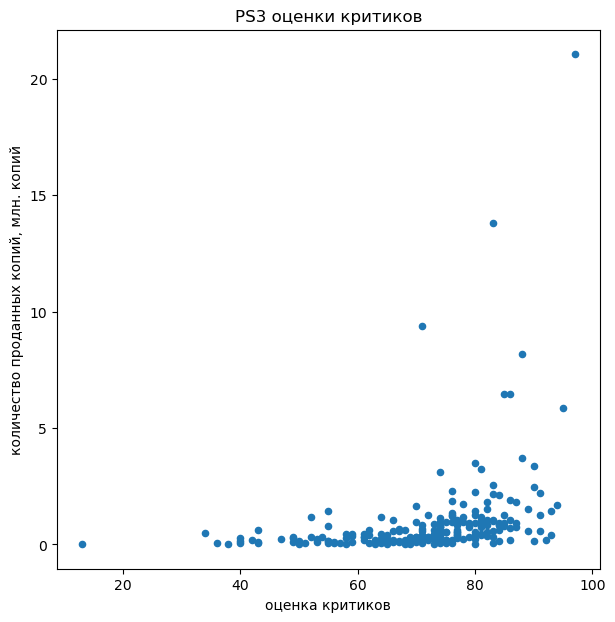

Коэффициент корреляции продаж и оценки критиков: 0.3341517575509856


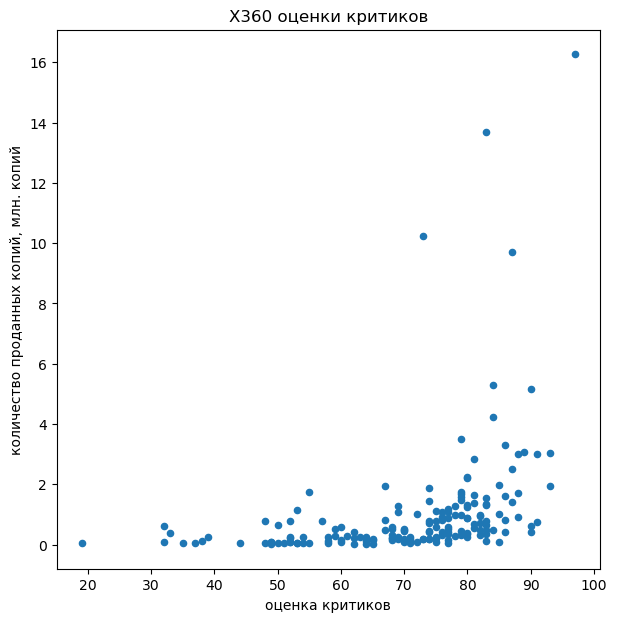

Коэффициент корреляции продаж и оценки критиков: 0.3605734888507336


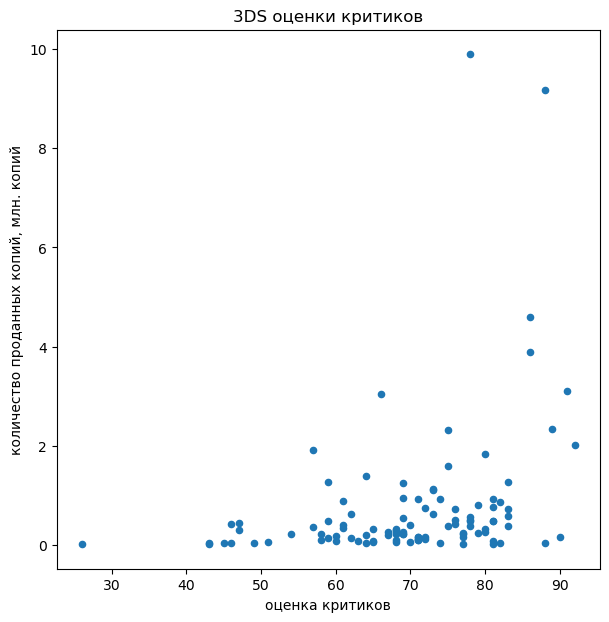

Коэффициент корреляции продаж и оценки критиков: 0.3208028695360785


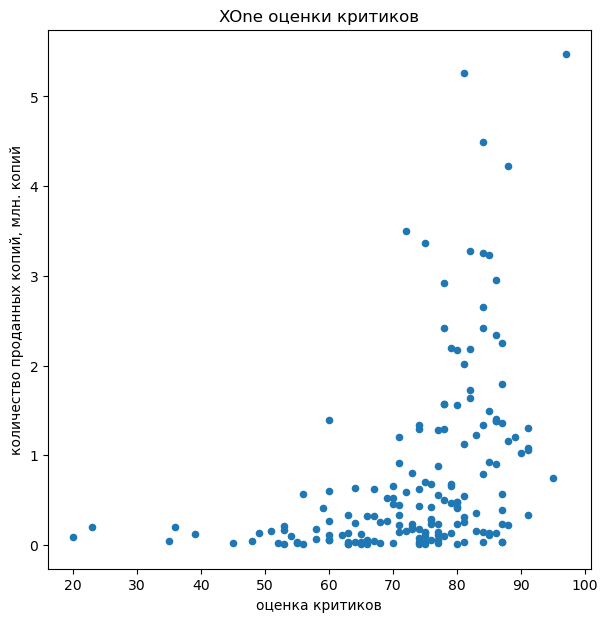

Коэффициент корреляции продаж и оценки критиков: 0.4169983280084017


In [46]:
# проверяем корелляцию для оценок критиков
actual_plat_list = ['PS3', 'X360', '3DS', 'XOne']
for p in actual_plat_list:
    critic_scat(p)

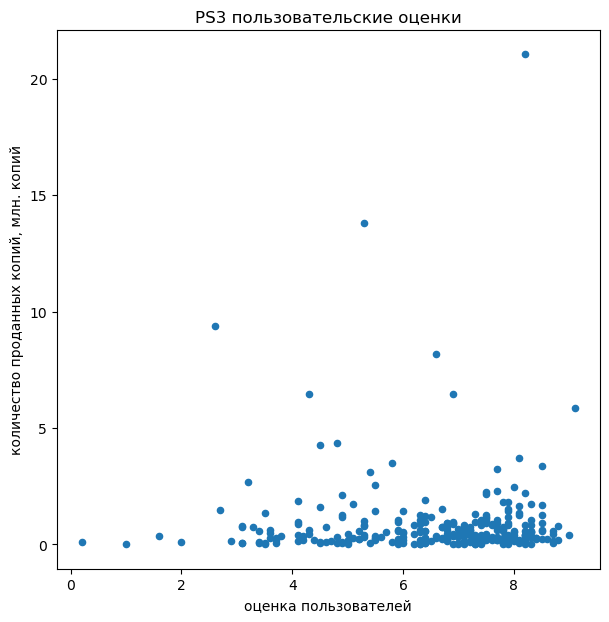

Коэффициент корреляции продаж и оценки пользователей: -0.006205767686051499


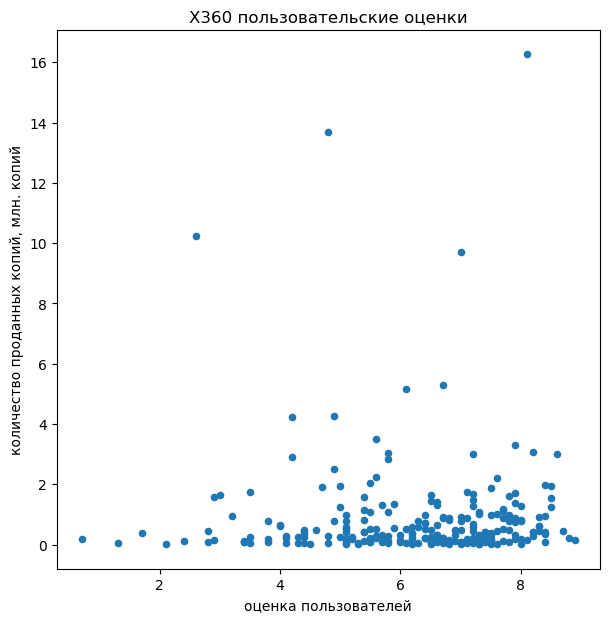

Коэффициент корреляции продаж и оценки пользователей: 0.006163978646213326


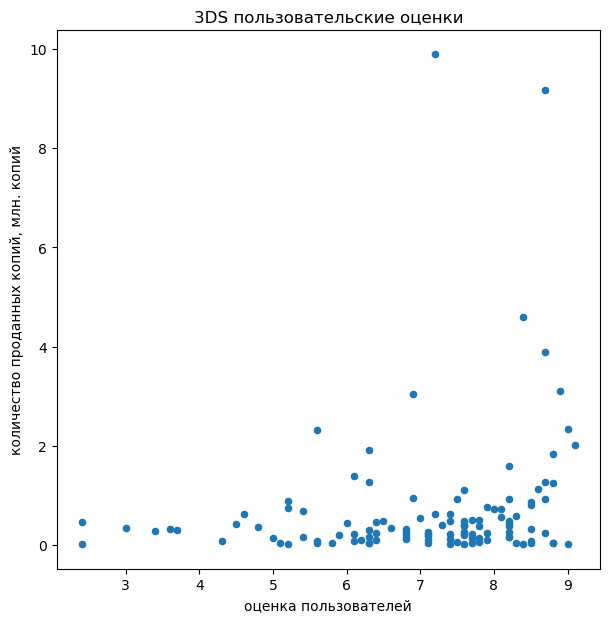

Коэффициент корреляции продаж и оценки пользователей: 0.19758263411038599


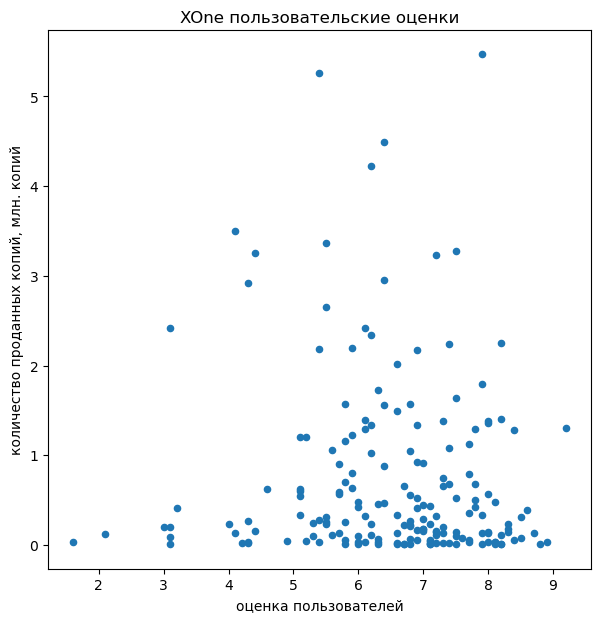

Коэффициент корреляции продаж и оценки пользователей: -0.06892505328279414


In [47]:
# проверяем корелляцию для оценок пользователей
actual_plat_list = ['PS3', 'X360', '3DS', 'XOne']
for p in actual_plat_list:
    user_scat(p)

Для оценок критиков и продаж, по остальным площадкам из ТОП-5, картина аналогичная - присутствует слабая положительяная корреляция, чем выше оценка критиков - тем больше копий игры проданно.

Для оценок пользователей, по остальным площадкам из ТОП-5, картина аналогичная - корреляция с продажами отстутствет. Исключение составляет платформа 3DS, где наблюдается очень слабая положительная корреляция между продажами и оценками пользователей.

### Распределение игр по жанрам.

Рассмотри данные за актуальный период, по всем площадкам

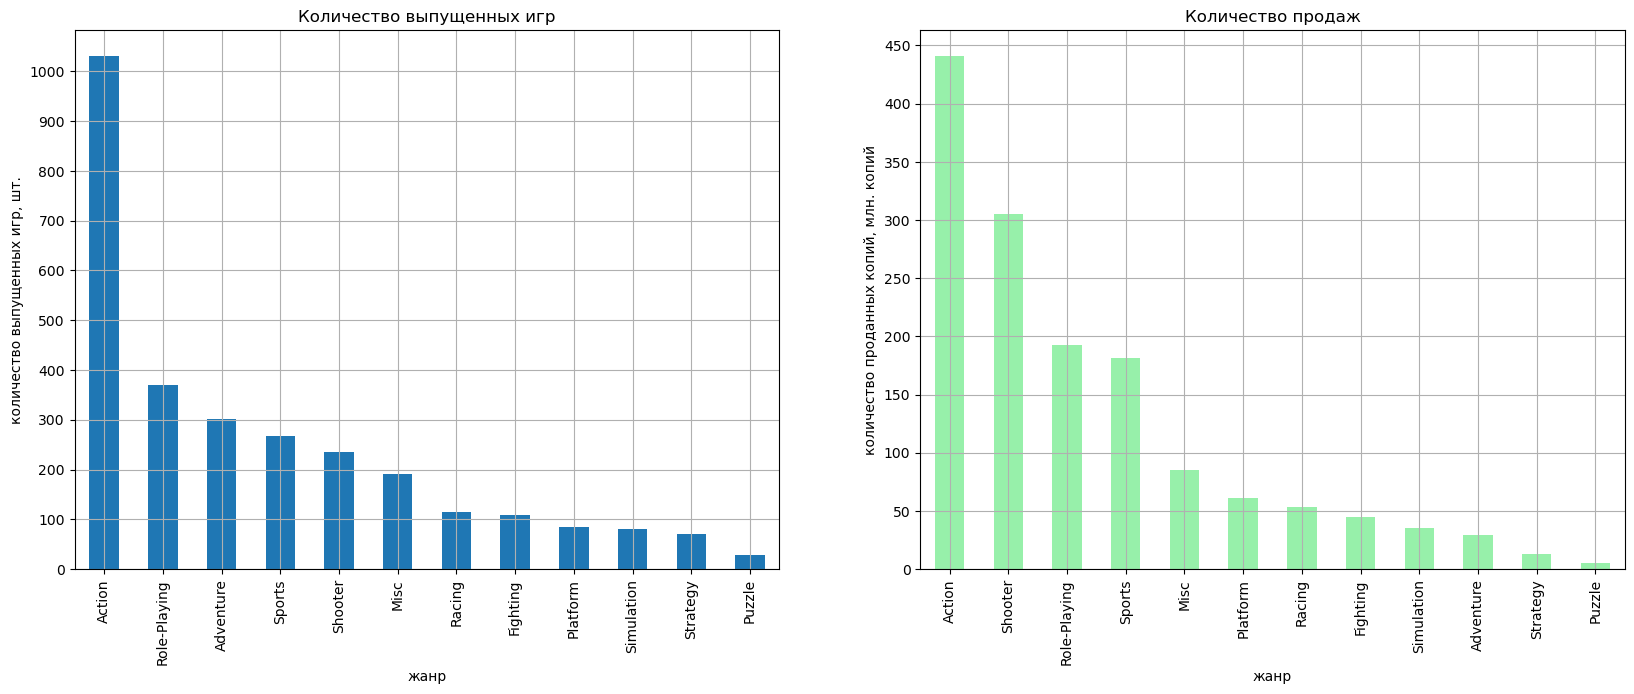

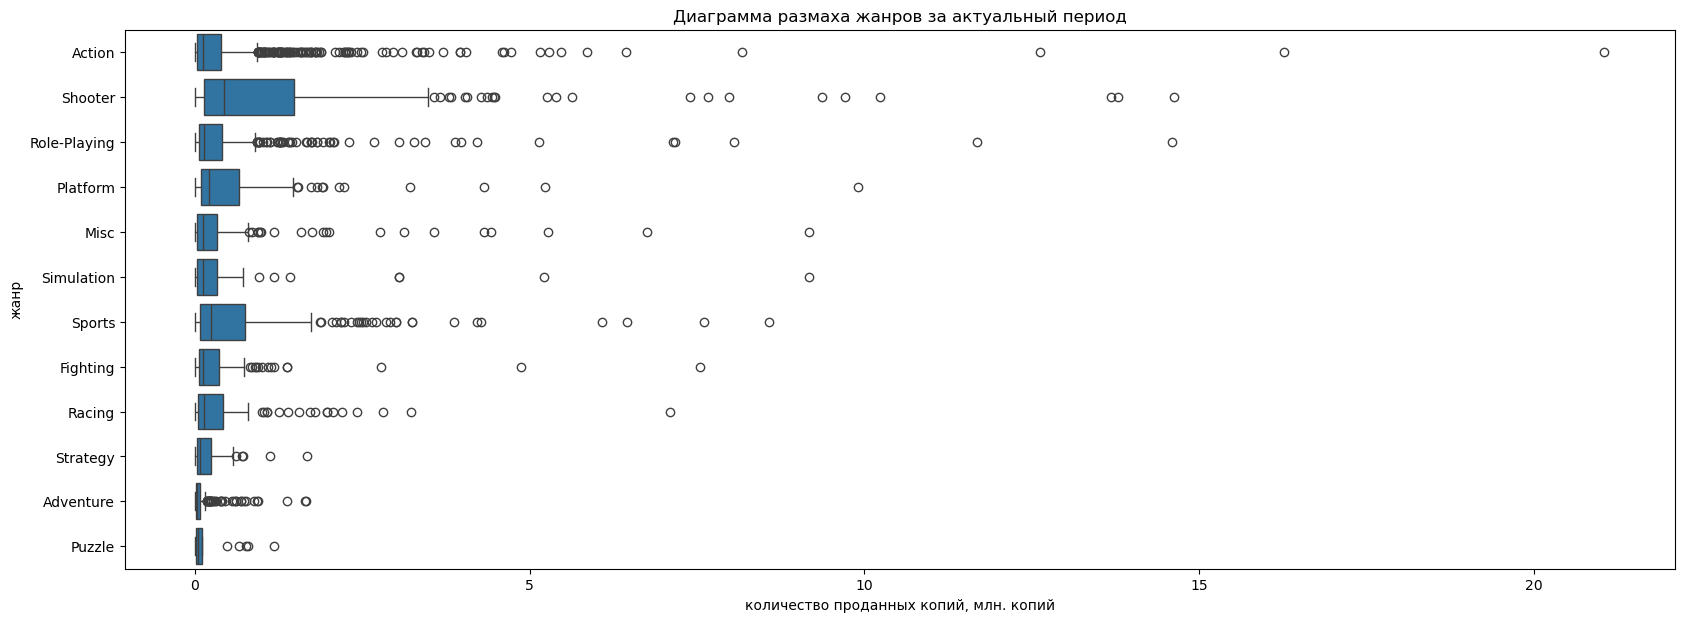

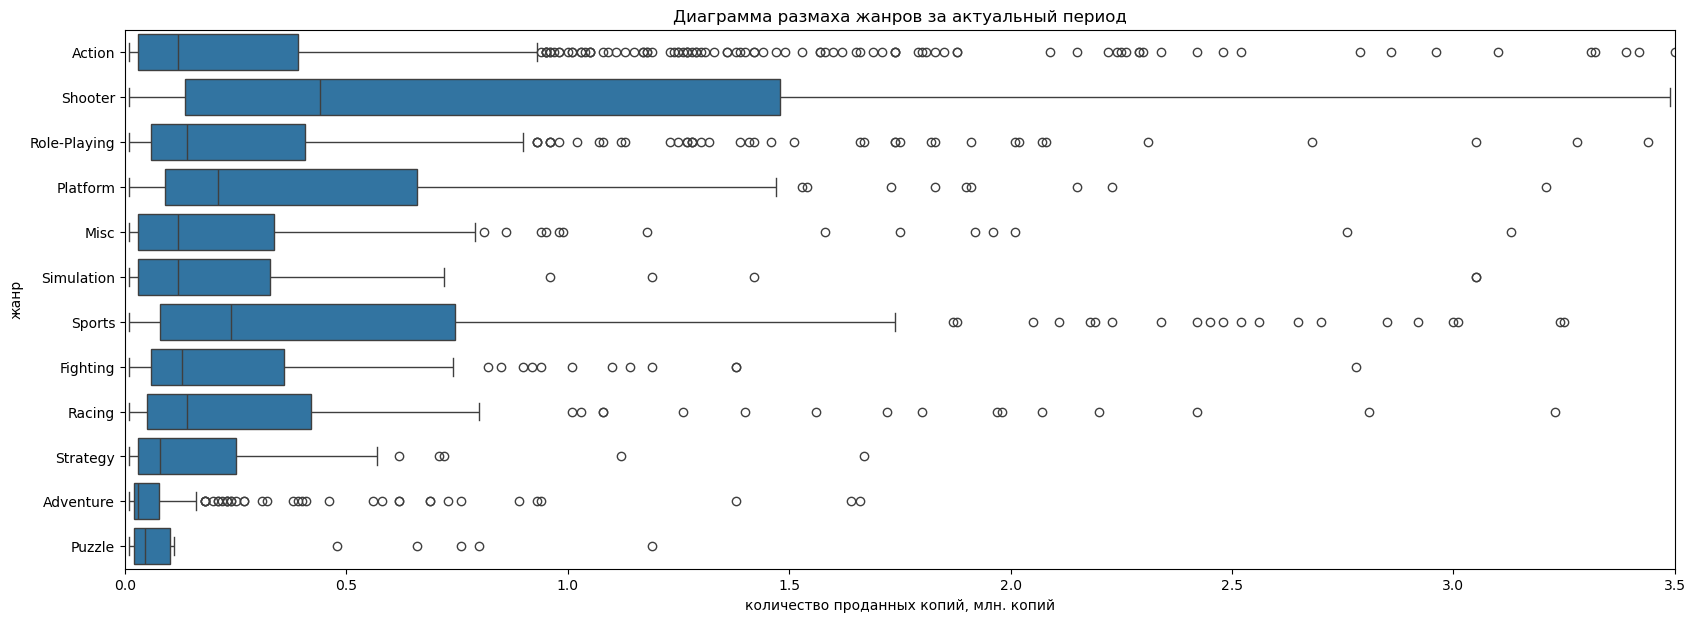

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


In [48]:
# постоим барплот по количеству выпущенных игр в зависимости от жанра
ax = plt.subplot(1, 2, 1)
data_games_actual.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending=False)\
.plot(kind='bar', ax=ax, figsize=(20, 7), legend=False, grid=True);
plt.locator_params(axis='y', nbins= 20)
plt.xlabel('жанр')
plt.ylabel('количество выпущенных игр, шт.')
plt.title('Количество выпущенных игр')

# постоим барплот по количеству проданных игр в зависимости от жанра
ax = plt.subplot(1, 2, 2)
data_games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)\
.plot(kind='bar', ax=ax, color='#97F0AA', legend=False, grid=True);
plt.locator_params(axis='y', nbins= 10)
plt.xlabel('жанр')
plt.ylabel('количество проданных копий, млн. копий')
plt.title('Количество продаж');

# построим боксплоты по продажам в разрезе жанров
plt.figure(figsize=(20, 7))
sb.boxplot(data=data_games_actual, x='total_sales', y='genre', orient='h');
plt.xlabel('количество проданных копий, млн. копий')
plt.ylabel('жанр')
plt.title('Диаграмма размаха жанров за актуальный период')
plt.show()

# построим боксплоты по продажам в разрезе жанров
plt.figure(figsize=(20, 7))
sb.boxplot(data=data_games_actual, x='total_sales', y='genre', orient='h');
plt.xlim(0,3.5)
plt.xlabel('количество проданных копий, млн. копий')
plt.ylabel('жанр')
plt.title('Диаграмма размаха жанров за актуальный период')
plt.show()

# выводим численную статистику по жанрам
data_games_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

По представленнным распределениям, в рамках актуального периода, можно сказать следующее:

По медианным продажам выделяем следующие группы:

**Медианные продажи 0.44 млн копий:**


   - Игры в жанре **Shooter**:
      - находятся на 5-м месте по объему выпуска: порядка 240 шт.;
      - по продажам на 2-м месте: порядка 305 млн.копий.
    
  
  *Жанр с высоко-стабильными продажами, при среднем объеме выпуска количества игр и большом количестве игр-хитов.*
  
  
**Медианные продажи 0.21 - 0.24 млн копий:**


  - Игры в жанре **Sports**:
    - находятся на 4-м месте по объему выпуска: порядка 280 шт.;
    - по продажам на 4-м месте: порядка 180 млн.копий.
    
  
  *Жанр с средне-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Platform**:
    - находятся на 9-м месте по объему выпуска: порядка 90 шт.;
    - по продажам на 6-м месте: порядка 60 млн.копий.
    
  
  *Жанр с средне-стабильными продажами, при небольшом объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
**Медианные продажи 0.12 - 0.14 млн копий:**

  - Игры в жанре **Role-Playing**:
    - находятся на 2-м месте по объему выпуска: порядка 370 шт.;
    - и на 3-м месте по продажам: порядка 190 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при большом объеме выпуска количества игр и большом количестве игр-хитов.*
  
  
  - Игры в жанре **Racing**:
    - находятся на 7-м месте по объему выпуска: порядка 110 шт.;
    - и на 7-м месте по продажам: порядка 55 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Fighting**:
    - находятся на 8-м месте по объему выпуска: порядка 105 шт.;
    - и на 8-м месте по продажам: порядка 45 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Action**:
    - находятся на 1-м месте по объему выпуска: более 1000 шт.;
    - и на 10-м месте по продажам: порядка 30 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при большом объеме выпуска количества игр и большом количестве игр-хитов.* 

    
  - Игры в жанре **Misc**:
    - находятся на 6-м месте по объему выпуска: порядка 190 шт.;
    - и на 5-м месте по продажам: порядка 80 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Simulation**:
    - находятся на 10-м месте по объему выпуска: порядка 85 шт.;
    - и на 5-м месте по продажам: порядка 40 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при неболшом объеме выпуска количества игр и среднем количестве игр-хитов.* 
  
  
**Медианные продажи 0.03 - 0.08 млн копий:**

  - Игры в жанре **Strategy**:
    - находятся на 11-м месте по объему выпуска: порядка 70 шт.;
    - и на 11-м месте по продажам: порядка 20 млн. копий.
  
  
  *Жанр с низкими продажами, при неболшом объеме выпуска количества игр и небольшом количестве игр-хитов.*


  - Игры в жанре **Puzzle**:
    - находятся на 12-м месте по объему выпуска: порядка 30 шт.;
    - и на 12-м месте по продажам: порядка 10 млн. копий.
    
  
  *Жанр с низкими продажами, при неболшом объеме выпуска количества игр и небольшом количестве игр-хитов.*
  
  
  - Игры в жанре **Adventure**:
    - находятся на 3-м месте по объему выпуска: порядка 305 шт.;
    - и на 10-м месте по продажам: порядка 10 млн. копий.
    
  
  *Жанр с низкими продажами, при большом объеме выпуска количества игр и небольшом количестве игр-хитов.*

### Промежуточные выводы

По результатам проведенного исследовательского анализа данных, можно сделать следующие выводы:


  - Количество выпускаемых игр имело тенеденцию роста начиная с 1994 по 2010. С 180 шт. до 1400 шт. внутри этого периода наблюдадались повышающие скачки, что связанно с выходом новых платформ (1994 - PlayStation 1, 2000 - PlayStation 2, 2006 - PlayStation 3);
  
  
  - С 2010 года наблюдается смена тренда, количество выпускаемых игр падает, что связанно с уходом игроков в мобильные игры. В 2012 уровень выпуска видеоигр стабилизируется. В период 2012 - 2016 годов, в среднем выпускается 550 игр в год;
  
  
  - На всех исторических данных выделены топ-8 платформ по продажам, для них определено, что реднее время нахождения платформы на рынке 7 лет;
  
  
  - Определен актуальный период для работы с данными и прогнозирования - начиная с 2012 года;
  
  
  - Для актуального периода выделены топ-5 платформ, для них определено, что продажи падают. Для платформ PS3, X360 и 3DS падение наблюдается на протяжении 2-3-х последних лет. Для более свежих платформ PS4 и XOne вывод о падении возможно не столь однозначен - на текущих данных видим максимум продаж в 2015 году, но у нас нет информации о полноте данных за 2016 год;
  
  
  - Для актуальных площадок медианное значение глобальных продаж находится в интервале 0.03 - 0.31 млн. копий. При этом у каждой площадки наблюдается большое количество игр-хитов, значения продаж, для которых, на порядок выше 80-ти % значений, в соотвествующих выборок. Так средние значения больше медианных в 2-4 раза. 


    Пять площадок имеют медианное значение 0.18 - 0.22 млн.копиий: PS3, PS4, XOne, WiiU и Wii. 

    Четыре площадки имеют медианное значение 0.03 - 0.08 млн.копиий: DS, PC, PSV и PSP

    Медианное значение площадки X360 - 0.31 млн.копиий.


    Медианное значение площадки 3DS - 0.11 млн.копиий.

    Можно сказать, что площадка X360 обладает несколько большей стабильностью продаж.
    
    
   - для топ-5 актуальных площадок определено, что присутствует слабая положительяная корреляция между оценками критиков и продажами, чем выше оценка критиков - тем больше копий игры проданно. Для оценок пользователей - корреляция с продажами отстутствет. Исключение составляет платформа 3DS, где наблюдается очень слабая положительная корреляция между продажами и оценками пользователей.
   
   
   - При исследовании данных за актуальный период, в разрезе жанров игр, можно сказать следующее:
   
________________________________________________________________________________________________________________________________

По медианным продажам выделяем следующие группы:

**Медианные продажи 0.44 млн копий:**


   - Игры в жанре **Shooter**:
        - находятся на 5-м месте по объему выпуска: порядка 240 шт.;
        - по продажам на 2-м месте: порядка 305 млн.копий.
    
  
  *Жанр с высоко-стабильными продажами, при среднем объеме выпуска количества игр и большом количестве игр-хитов.*
  
  
**Медианные продажи 0.21 - 0.24 млн копий:**


  - Игры в жанре **Sports**:
    - находятся на 4-м месте по объему выпуска: порядка 280 шт.;
    - по продажам на 4-м месте: порядка 180 млн.копий.
    
  
  *Жанр с средне-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Platform**:
    - находятся на 9-м месте по объему выпуска: порядка 90 шт.;
    - по продажам на 6-м месте: порядка 60 млн.копий.
    
  
  *Жанр с средне-стабильными продажами, при небольшом объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
**Медианные продажи 0.12 - 0.14 млн копий:**

  - Игры в жанре **Role-Playing**:
    - находятся на 2-м месте по объему выпуска: порядка 370 шт.;
    - и на 3-м месте по продажам: порядка 190 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при большом объеме выпуска количества игр и большом количестве игр-хитов.*
  
  
  - Игры в жанре **Racing**:
    - находятся на 7-м месте по объему выпуска: порядка 110 шт.;
    - и на 7-м месте по продажам: порядка 55 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Fighting**:
    - находятся на 8-м месте по объему выпуска: порядка 105 шт.;
    - и на 8-м месте по продажам: порядка 45 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Action**:
    - находятся на 1-м месте по объему выпуска: более 1000 шт.;
    - и на 10-м месте по продажам: порядка 30 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при большом объеме выпуска количества игр и большом количестве игр-хитов.* 

    
  - Игры в жанре **Misc**:
    - находятся на 6-м месте по объему выпуска: порядка 190 шт.;
    - и на 5-м месте по продажам: порядка 80 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Simulation**:
    - находятся на 10-м месте по объему выпуска: порядка 85 шт.;
    - и на 5-м месте по продажам: порядка 40 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при неболшом объеме выпуска количества игр и среднем количестве игр-хитов.* 
  
  
**Медианные продажи 0.03 - 0.08 млн копий:**

  - Игры в жанре **Strategy**:
    - находятся на 11-м месте по объему выпуска: порядка 70 шт.;
    - и на 11-м месте по продажам: порядка 20 млн. копий.
  
  
  *Жанр с низкими продажами, при неболшом объеме выпуска количества игр и небольшом количестве игр-хитов.*


  - Игры в жанре **Puzzle**:
    - находятся на 12-м месте по объему выпуска: порядка 30 шт.;
    - и на 12-м месте по продажам: порядка 10 млн. копий.
    
  
  *Жанр с низкими продажами, при неболшом объеме выпуска количества игр и небольшом количестве игр-хитов.*
  
  
  - Игры в жанре **Adventure**:
    - находятся на 3-м месте по объему выпуска: порядка 305 шт.;
    - и на 10-м месте по продажам: порядка 10 млн. копий.
    
  
  *Жанр с низкими продажами, при большом объеме выпуска количества игр и небольшом количестве игр-хитов.*

## Региональный портрет пользователя.

### Популярность платформ по регионам.

In [49]:
# выведем пайплоты с процентами для всех регионов продаж по площадкам
list_region = ['na_sales', 'eu_sales', 'jp_sales']
dict_region = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
i = 1
print('Доля продаж ТОП-5 платформ по регионам')
for region in list_region:
    ax = plt.subplot(2, 2,  i)
    top_regional_plat = list(data_games_actual.pivot_table(index='platform',  values= region, aggfunc='sum').sort_values(by=region, ascending=False).head(5).index)
    data_reg_plat = data_games_actual.copy()
    for p in data_reg_plat['platform'].unique():
        if p not in top_regional_plat:
            data_reg_plat.loc[data_reg_plat['platform']==p, 'platform'] = 'other'
    data_reg_plat.pivot_table(index='platform', values= region, aggfunc='sum').plot(y=region, kind='pie', ax=ax, legend=False, a, figsize=(10,10));
    plt.ylabel('')
    plt.title(dict_region[region])
    plt.show()
    i += 1


SyntaxError: positional argument follows keyword argument (2002988997.py, line 13)

Видно, что за актульный период, наблюдается следующая картина, для топ-5 площадок в каждом регионе:


  - В севреной Америке лидирует платформа X360 - 24 % всех продаж, далее: PS4 - 18 %, PS3 - 17 %, XOne - 16 %, 3DS - 9 %, остальные - 15%;
  - В Европе лидирует платформа PS4 - 28 %, далее: PS3 - 21%, X360 - 15 %, XOne - 10%, 3DS 8, остальные - 18%;
  - В Японии лидирует платформа 3DS - 46 % рынка, далее: PS3 - 18%, PSV - 11 %, PS4 - 8 %, WiiU - 7%, остальные - 10%;
  
Посмтотрим платформы по регионам:


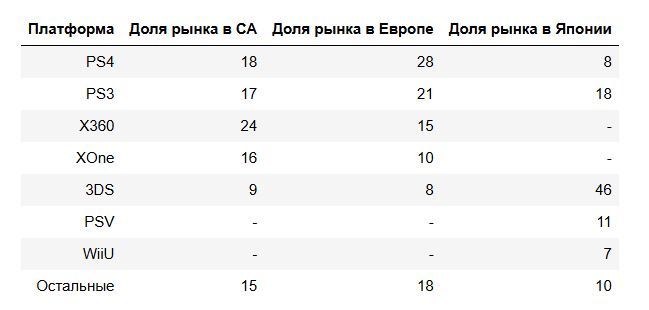

  - Платформа PS4 наиболее популярна в Европе, где имеет 28% продаж от всего рынка, в СА её доля продаж составляет 18 %, с Японии 8%;

  - Платформа PS3 так же наиболее популярна в Европе, где имеет 28% продаж от всего рынка, популярность в СА и Японии почти одинакова - 17 и 18 %, соотвственно;
  
  - Платформа Х360 по продажам лидирует в СА, занимая 24 % местного рынка, в Европе - 15%, в Японии данная платформа не попала в ТОП-5 по продажам;
  
  - Платформа ХОne по продажам лидирует в СА, занимая 16 % местного рынка, в Европе - 10%, в Японии данная платформа не попала в ТОП-5 по продажам;
  
  - Платформа 3DS абсолютный лидер Японского рынка, 46 % всех местных продаж, на рынках СА и Европы представлена крайне скромно: 9 и 8 %, соотвественно;
  
  - Площадки PSV и WiiU представлены в ТОП-5 только в Японии: 11 и 7% соотвественно;


### Популярность жанров по регионам

In [ ]:
# выведем пайплоты с процентами для всех регионов продаж по жанрам
list_region = ['na_sales', 'eu_sales', 'jp_sales']
dict_region = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
i = 1
print('Доля продаж ТОП-5 платформ по жанрам')
for region in list_region:
    ax = plt.subplot(2, 2,  i)
    top_regional_genre = list(data_games_actual.pivot_table(index='genre',  values= region, aggfunc='sum').sort_values(by=region, ascending=False).head(5).index)
    data_reg_genre = data_games_actual.copy()
    for g in data_reg_genre['genre'].unique():
        if g not in top_regional_genre:
            data_reg_genre.loc[data_reg_genre['genre']==g, 'genre'] = 'other'
    data_reg_genre.pivot_table(index='genre', values= region, aggfunc='sum').plot(y=region, kind='pie', ax=ax, legend=False, autopct='%.0f', figsize=(10,10));
    plt.ylabel('')
    plt.title(dict_region[region])
    plt.show()
    i += 1

Видно, что за актульный период, наблюдается следующая картина, для топ-5 жанров в каждом регионе:


  - В севреной Америке лидирует жанр Action - 30 % всех продаж, далее: Shooter - 24 %, Sports - 14%, Role-Playing -11 %, Misc - 6%, остальные жанры - 14%;
  - В Европе лидирует жанр Action - 31 %, далее: Shooter - 22 %, Sports - 14%, Role-Playing -10 %, Racing - 5%, остальные жанры - 18%;
  - В Японии лидирует жанр Role-Playing - 34 %, далее: Action - 27 %, Misc - 7%, Simulation -5 %, Fighting - 5%, остальные жанры - 22%;
  
Видим, что опять выделяется Япония, где есть два лидирующих жанра - Role-Playing и Action, которые забирают порядка 60 % всего рынка.

### Влияние рейтинга ERSB на региональные продажи

In [ ]:
# выведем пайплоты с процентами для всех регионов продаж
list_region = ['na_sales', 'eu_sales', 'jp_sales']
dict_region = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
i = 1
print('Региональные продажи по рейтингу ESRB')
for region in list_region:
    ax = plt.subplot(2, 2,  i)
    data_games_actual.pivot_table(index='rating',  values= region, aggfunc='sum')\
    .plot(y=region, kind='pie', ax=ax, legend=False, autopct='%.0f', figsize=(20,20));
    plt.ylabel('')
    plt.title(dict_region[region])
    plt.show()
    i += 1

М - Подходит для лиц старше 17 лет;

Е - Подходит для всех возрастных категорий;

E10+ - Подходит для лиц старше 10 лет;

Т - Подходит для лиц старше 13 лет.




Видно, что за актульный период, наблюдается следующая картина, для продаж по рейтингу ERSB:


  - В севреной Америке лидирует рейтинг M - 39 % всех продаж, далее: E - 19 %, E10+ - 13%, T - 11%, не промаркированных игр - 17%;
  - В Европе лидирует рейтинг M - 38 % всех продаж, далее: E - 22 %, E10+ - 11%, T - 10%, не промаркированных игр - 18%;
  - В Японии лидирует рейтинг E - 15 % всех продаж, далее: T - 14 %, M - 11 %,E10+  - 4%, не промаркированных игр - 57%;
  
  
Видим, что опять выделяется Япония, здесь по продажам лидируют более "молодые" рейтинги: подходит для всех возрастов и подходит для лиц старше 13 лет - суммарно порядка 30 % продаж.


### Промежуточный вывод

Проведя исследование по региональным продажам, можно сделать следующие выводы:
  - Распределение продаж для топ-5 площадок в каждом регионе:


    - В севреной Америке лидирует платформа X360 - 24 % всех продаж, далее: PS4 - 18 %, PS3 - 17 %, XOne - 16 %, 3DS - 9 %, остальные - 15%;
    - В Европе лидирует платформа PS4 - 28 %, далее: PS3 - 21%, X360 - 15 %, XOne - 10%, 3DS 8, остальные - 18%;
    - В Японии лидирует платформа 3DS - 46 % рынка, далее: PS3 - 18%, PSV - 11 %, PS4 - 8 %, WiiU - 7%, остальные - 10%;
  
Посмтотрим платформы по регионам:


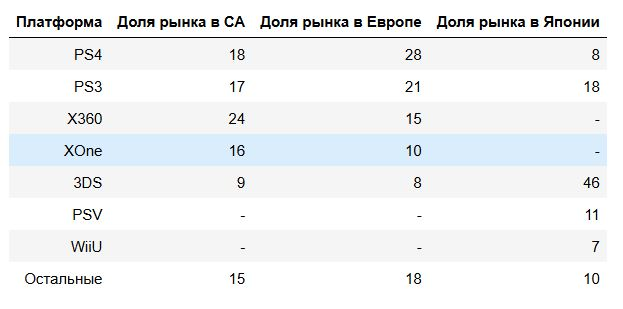

    - Платформа PS4 наиболее популярна в Европе, где имеет 28% продаж от всего рынка, в СА её доля продаж составляет 18 %, с Японии 8%;

    - Платформа PS3 так же наиболее популярна в Европе, где имеет 28% продаж от всего рынка, популярность в СА и Японии почти одинакова - 17 и 18 %, соотвственно;
  
    - Платформа Х360 по продажам лидирует в СА, занимая 24 % местного рынка, в Европе - 15%, в Японии данная платформа не попала в ТОП-5 по продажам;
  
    - Платформа ХОne по продажам лидирует в СА, занимая 16 % местного рынка, в Европе - 10%, в Японии данная платформа не попала в ТОП-5 по продажам;
  
    - Платформа 3DS абсолютный лидер Японского рынка, 46 % всех местных продаж, на рынках СА и Европы представлена крайне скромно: 9 и 8 %, соотвественно;
  
    - Площадки PSV и WiiU представлены в ТОП-5 только в Японии: 11 и 7% соотвественно;

    
    
  - Распределение продаж для топ-5 жанров в каждом регионе:


    - В севреной Америке лидирует жанр Action - 30 % всех продаж, далее: Shooter - 24 %, Sports - 14%, Role-Playing -11 %, Misc - 6%, остальные жанры - 14%;
    - В Европе лидирует жанр Action - 31 %, далее: Shooter - 22 %, Sports - 14%, Role-Playing -10 %, Racing - 5%, остальные жанры - 18%;
    - В Японии лидирует жанр Role-Playing - 34 %, далее: Action - 27 %, Misc - 7%, Simulation -5 %, Fighting - 5%, остальные жанры - 22%;
  
      Видим, что опять выделяется Япония, где есть два лидирующих жанра - Role-Playing и Action, которые забирают порядка 60 % всего рынка.
    
    
  - Региональное распределение продаж по рейтингу ERSB:


    - В севреной Америке лидирует рейтинг M - 39 % всех продаж, далее: E - 19 %, E10+ - 13%, T - 11%, не промаркированных игр - 17%;
    - В Европе лидирует рейтинг M - 38 % всех продаж, далее: E - 22 %, E10+ - 11%, T - 10%, не промаркированных игр - 18%;
    - В Японии лидирует рейтинг E - 15 % всех продаж, далее: T - 14 %, M - 11 %,E10+  - 4%, не промаркированных игр - 57%;
  
  
      Видим, что опять выделяется Япония, здесь по продажам лидируют более "молодые" рейтинги: подходит для всех возрастов и подходит для лиц старше 13 лет - суммарно порядка 30 % продаж.


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Работать будем с данными за актуальный период.

По факту имеем две независимые выборки, по двум платформам, значит будем использовать двухвыборочный t-тест для независимых выборок.

Сформулируем гипотезы:
- Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны;
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [ ]:
# создадим выборки
xone = data_games_actual[(data_games_actual['platform'] == 'XOne') & (data_games_actual['user_score'] >= 0)]['user_score']
pc = data_games_actual[(data_games_actual['platform'] == 'PC') & (data_games_actual['user_score'] >= 0)]['user_score']

In [ ]:
# уровень статистической значимости
alpha = 0.05

# двухсторонний тест
result = st.ttest_ind(xone, pc)

print('Значение P-value ', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Отвергаем гипотезу H0, в пользу гипотезы H1')
else:
    print('Не можем отвергнуть гипотезу H0')

print('Среднее значение оценок пользователей платформы XOne:', round(xone.mean(),2))    
print('Среднее значение оценок пользователей платформы PC:', round(pc.mean(),2))

Таким образом мы не можем отвергнуть гипотезу о том, что средние оценки пользователей платформ PC и Xbox One одинаковы, так как вероятность этого больше уровня статистической значимости.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Работать будем с данными за актуальный период.

По факту имеем две независимые выборки, по двум платформам, значит будем использовать двухвыборочный t-тест для независимых выборок.

Сформулируем гипотезы:
- Н0: Средние пользовательские рейтинги жанров Action и Sports равны;
- Н1: Средние пользовательские рейтинги платформ жанров Action и Sports различны.

In [ ]:
# создадим выборки
action = data_games_actual[(data_games_actual['genre'] == 'Action') & (data_games_actual['user_score'] >= 0)]['user_score']
sports = data_games_actual[(data_games_actual['genre'] == 'Sports') & (data_games_actual['user_score'] >= 0)]['user_score']

In [ ]:
# уровень статистической значимости
alpha = 0.05

# двусторонний тест
result = st.ttest_ind(action, sports)

print('Значение P-value ', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Отвергаем гипотезу H0, в пользу гипотезы H1')
else:
    print('Не можем отвергнуть гипотезу H0')

print('Среднее значение оценок жанра Action:', round(action.mean(),2))
print('Среднее значение оценок жанра Sports:', round(sports.mean(),2))

Таким образом мы отвергаем гипотезу о том, что средние оценки пользователей жанров Action и Sports одинаковы, так как вероятность этого меньше уровня статистической значимости. Принимаем гипотезу, что они отличаются.

### Промежуточный вывод

В результате проведенных статистических тестов можно сделать следующие выводы:


  - нвозможно отвергнуть гипотезу о том, что средние оценки пользователей платформ PC и Xbox One одинаковы, так как вероятность этого больше уровня статистической значимости;
  
  
  - отвергаем гипотезу о том, что средние оценки пользователей жанров Action и Sports одинаковы, так как вероятность этого меньше уровня статистической значимости. Принимаем гипотезу, что они отличаются.

## Общий вывод

Были получены из открытых источников, данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные загрузились без ошибок. В датафрейме 12 столбцов и 16715 строк.


**В ходе предварительной обработки данных была проделена следующая работа:**


  - названия столбцов датафрейма приведены к "змеиному стилю";
  
  
  - явные дубликаты не были обнаружены;
  
  
  - были обнаружены неявные дубликаты по названию игры, платформе и году релиза, удалены дуюлирующиеся строчки с меньшим объемом информации в других столбцах;
  
  
  - обработка пропусков:

    - удалены строки с пропусками по столбцам 'year_of_release', 'name' и 'genre';
    - количество удаленных данных - порядка 1.63 % от первоначального объема данных;
    - пропуски в столбцах 'critic_score' и 'user_score' (числовые данные) заменены на значения-индикаторы (отрицательные числа);
    - пропуски в столбце 'rating' (категориальные данные) заменены на значения-индикаторы;
  
  
  - изменены типы данных: 'year_of_release' на DateTime, 'critic_score' на int, 'user_score' на float.
  
  
  - создан дополнительный столбец с суммарными продажами по всем регионам.
  
  
**По результатам проведенного исследовательского анализа данных, можно сделать следующие выводы:**


  - Количество выпускаемых игр имело тенеденцию роста начиная с 1994 по 2010. С 180 шт. до 1400 шт. внутри этого периода наблюдадались повышающие скачки, что связанно с выходом новых платформ (1994 - PlayStation 1, 2000 - PlayStation 2, 2006 - PlayStation 3);
  
  
  - С 2010 года наблюдается смена тренда, количество выпускаемых игр падает, что связанно с уходом игроков в мобильные игры. В 2012 уровень выпуска видеоигр стабилизируется. В период 2012 - 2016 годов, в среднем выпускается 550 игр в год;
  
  
  - На всех исторических данных выделены топ-8 платформ по продажам, для них определено, что реднее время нахождения платформы на рынке 7 лет;
  
  
  - Определен актуальный период для работы с данными и прогнозирования - начиная с 2012 года;
  
  
  - Для актуального периода выделены топ-5 платформ, для них определено, что продажи падают. Для платформ PS3, X360 и 3DS падение наблюдается на протяжении 2-3-х последних лет. Для более свежих платформ PS4 и XOne вывод о падении возможно не столь однозначен - на текущих данных видим максимум продаж в 2015 году, но у нас нет информации о полноте данных за 2016 год;
  
  
  - Для актуальных площадок медианное значение глобальных продаж находится в интервале 0.03 - 0.31 млн. копий. При этом у каждой площадки наблюдается большое количество игр-хитов, значения продаж, для которых, на порядок выше 80-ти % значений, в соотвествующих выборок. Так средние значения больше медианных в 2-4 раза.
  
    Пять площадок имеют медианное значение 0.18 - 0.22 млн.копиий: PS3, PS4, XOne, WiiU и Wii. 

    Четыре площадки имеют медианное значение 0.03 - 0.08 млн.копиий: DS, PC, PSV и PSP

    Медианное значение площадки X360 - 0.31 млн.копиий.


    Медианное значение площадки 3DS - 0.11 млн.копиий.

    Можно сказать, что площадка X360 обладает несколько большей стабильностью продаж.
    
    
   - для топ-5 актуальных площадок определено, что присутствует слабая положительяная корреляция между оценками критиков и продажами, чем выше оценка критиков - тем больше копий игры проданно. Для оценок пользователей - корреляция с продажами отстутствет. Исключение составляет платформа 3DS, где наблюдается очень слабая положительная корреляция между продажами и оценками пользователей.
   
   
   - При исследовании данных за актуальный период, в разрезе жанров игр, можно сказать следующее:
   
________________________________________________________________________________________________________________________________

По медианным продажам выделяем следующие группы:


**Медианные продажи 0.44 млн копий:**


   - Игры в жанре **Shooter**:
        - находятся на 5-м месте по объему выпуска: порядка 240 шт.;
        - по продажам на 2-м месте: порядка 305 млн.копий.
    
  
  *Жанр с высоко-стабильными продажами, при среднем объеме выпуска количества игр и большом количестве игр-хитов.*
  
  
**Медианные продажи 0.21 - 0.24 млн копий:**


  - Игры в жанре **Sports**:
    - находятся на 4-м месте по объему выпуска: порядка 280 шт.;
    - по продажам на 4-м месте: порядка 180 млн.копий.
    
  
  *Жанр с средне-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Platform**:
    - находятся на 9-м месте по объему выпуска: порядка 90 шт.;
    - по продажам на 6-м месте: порядка 60 млн.копий.
    
  
  *Жанр с средне-стабильными продажами, при небольшом объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
**Медианные продажи 0.12 - 0.14 млн копий:**

  - Игры в жанре **Role-Playing**:
    - находятся на 2-м месте по объему выпуска: порядка 370 шт.;
    - и на 3-м месте по продажам: порядка 190 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при большом объеме выпуска количества игр и большом количестве игр-хитов.*
  
  
  - Игры в жанре **Racing**:
    - находятся на 7-м месте по объему выпуска: порядка 110 шт.;
    - и на 7-м месте по продажам: порядка 55 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Fighting**:
    - находятся на 8-м месте по объему выпуска: порядка 105 шт.;
    - и на 8-м месте по продажам: порядка 45 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Action**:
    - находятся на 1-м месте по объему выпуска: более 1000 шт.;
    - и на 10-м месте по продажам: порядка 30 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при большом объеме выпуска количества игр и большом количестве игр-хитов.* 

    
  - Игры в жанре **Misc**:
    - находятся на 6-м месте по объему выпуска: порядка 190 шт.;
    - и на 5-м месте по продажам: порядка 80 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при среднем объеме выпуска количества игр и среднем количестве игр-хитов.*
  
  
  - Игры в жанре **Simulation**:
    - находятся на 10-м месте по объему выпуска: порядка 85 шт.;
    - и на 5-м месте по продажам: порядка 40 млн. копий.
    
  
  *Жанр с низко-стабильными продажами, при неболшом объеме выпуска количества игр и среднем количестве игр-хитов.* 
  
  
**Медианные продажи 0.03 - 0.08 млн копий:**

  - Игры в жанре **Strategy**:
    - находятся на 11-м месте по объему выпуска: порядка 70 шт.;
    - и на 11-м месте по продажам: порядка 20 млн. копий.
  
  
  *Жанр с низкими продажами, при неболшом объеме выпуска количества игр и небольшом количестве игр-хитов.*


  - Игры в жанре **Puzzle**:
    - находятся на 12-м месте по объему выпуска: порядка 30 шт.;
    - и на 12-м месте по продажам: порядка 10 млн. копий.
    
  
  *Жанр с низкими продажами, при неболшом объеме выпуска количества игр и небольшом количестве игр-хитов.*
  
  
  - Игры в жанре **Adventure**:
    - находятся на 3-м месте по объему выпуска: порядка 305 шт.;
    - и на 10-м месте по продажам: порядка 10 млн. копий.
    
  
  *Жанр с низкими продажами, при большом объеме выпуска количества игр и небольшом количестве игр-хитов.*


Проведя исследование по региональным продажам, можно сделать следующие выводы:
  - Распределение продаж для топ-5 площадок в каждом регионе:


    - В севреной Америке лидирует платформа X360 - 24 % всех продаж, далее: PS4 - 18 %, PS3 - 17 %, XOne - 16 %, 3DS - 9 %, остальные - 15%;
    - В Европе лидирует платформа PS4 - 28 %, далее: PS3 - 21%, X360 - 15 %, XOne - 10%, 3DS 8, остальные - 18%;
    - В Японии лидирует платформа 3DS - 46 % рынка, далее: PS3 - 18%, PSV - 11 %, PS4 - 8 %, WiiU - 7%, остальные - 10%;
  
Посмтотрим платформы по регионам:


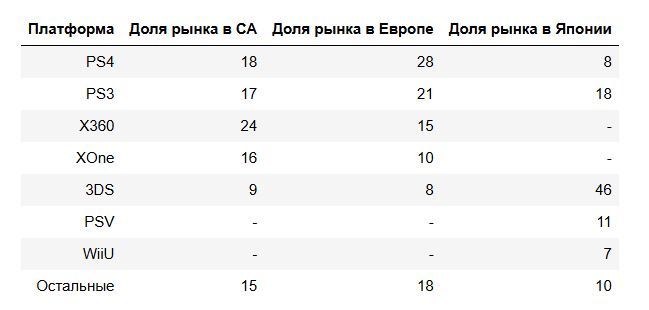

    - Платформа PS4 наиболее популярна в Европе, где имеет 28% продаж от всего рынка, в СА её доля продаж составляет 18 %, с Японии 8%;

    - Платформа PS3 так же наиболее популярна в Европе, где имеет 28% продаж от всего рынка, популярность в СА и Японии почти одинакова - 17 и 18 %, соотвственно;
  
    - Платформа Х360 по продажам лидирует в СА, занимая 24 % местного рынка, в Европе - 15%, в Японии данная платформа не попала в ТОП-5 по продажам;
  
    - Платформа ХОne по продажам лидирует в СА, занимая 16 % местного рынка, в Европе - 10%, в Японии данная платформа не попала в ТОП-5 по продажам;
  
    - Платформа 3DS абсолютный лидер Японского рынка, 46 % всех местных продаж, на рынках СА и Европы представлена крайне скромно: 9 и 8 %, соотвественно;
  
    - Площадки PSV и WiiU представлены в ТОП-5 только в Японии: 11 и 7% соотвественно;

    
    
  - Распределение продаж для топ-5 жанров в каждом регионе:


    - В севреной Америке лидирует жанр Action - 30 % всех продаж, далее: Shooter - 24 %, Sports - 14%, Role-Playing -11 %, Misc - 6%, остальные жанры - 14%;
    - В Европе лидирует жанр Action - 31 %, далее: Shooter - 22 %, Sports - 14%, Role-Playing -10 %, Racing - 5%, остальные жанры - 18%;
    - В Японии лидирует жанр Role-Playing - 34 %, далее: Action - 27 %, Misc - 7%, Simulation -5 %, Fighting - 5%, остальные жанры - 22%;
  
      Видим, что опять выделяется Япония, где есть два лидирующих жанра - Role-Playing и Action, которые забирают порядка 60 % всего рынка.
    
    
  - Региональное распределение продаж по рейтингу ERSB:


    - В севреной Америке лидирует рейтинг M - 39 % всех продаж, далее: E - 19 %, E10+ - 13%, T - 11%, не промаркированных игр - 17%;
    - В Европе лидирует рейтинг M - 38 % всех продаж, далее: E - 22 %, E10+ - 11%, T - 10%, не промаркированных игр - 18%;
    - В Японии лидирует рейтинг E - 15 % всех продаж, далее: T - 14 %, M - 11 %,E10+  - 4%, не промаркированных игр - 57%;
  
  
      Видим, что опять выделяется Япония, здесь по продажам лидируют более "молодые" рейтинги: подходит для всех возрастов и подходит для лиц старше 13 лет - суммарно порядка 30 % продаж.
    
**В результате проведенных статистических тестов можно сделать следующие выводы:**


  - нвозможно отвергнуть гипотезу о том, что средние оценки пользователей платформ PC и Xbox One одинаковы, так как вероятность этого больше уровня статистической значимости;
  
  
  - отвергаем гипотезу о том, что средние оценки пользователей жанров Action и Sports одинаковы, так как вероятность этого меньше уровня статистической значимости. Принимаем гипотезу, что они отличаются.
  
  
**РЕКОМЕНДАЦИИ**
При планировании продаж на 2017 год, рекомендуем обратить внимание на следующие моменты:

  - Сделать упор на платформы PS4 и XOne, как наиболее свежие и потенциально растущие;
  - Продавать игры с высокими оценками у критиков;
  - Глобально сосредоточиться на играх в жанрах: Action, Shooter, Role-Playing, Sports, Misc и Adventure;
  - При планировании региональных продаж необходимо учесть, особенности и предпочтения пользователей. Так напрмер в Японии любовь пользователей к жанру  Role-Playing на платформе 3DS. В Европе к жанру Action на платформе PS4. В Севреной Америке так же Action но у же на X360. Так же необходимо помнить, что рынок Японии более молодой, играть там начинают с детства.